In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def main_dataframe(url : str):
    df = pd.read_csv(url)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return df

In [3]:
def calculate_le_and_acc(country: str, year : int, df):
    output_list = []
    # get training data
    X_train = df.year.values
    y_train = df.life_expectancy.values
    # reshape training data
    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    # fit data with linear regressor
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # train accuracy
    train_accuracy = round(regressor.score(X_train, y_train), 4)
    
    # predict life expectancy of country 
    predicted_life_expectancy_matrix = regressor.predict(np.array(year).reshape(1,-1))
    predicted_life_expectancy = predicted_life_expectancy_matrix[0][0]
    
    output_list.append(predicted_life_expectancy)
    output_list.append(train_accuracy)
    
    return output_list

In [4]:
def make_dataframe_life_expectancies(list_countries, year : int):
    # init dict for saving life expectancies
    dict_le_countries = {}
    
    # init dataframe and clean column names
    df = main_dataframe("LifeExpectancyData.csv")
    df = df.dropna()
    
    for country in list_countries:
        # get appropriate data for regressing the life expectancy for a country
        df_country = df[df.country == country] # select the country and leave main_df be
        df_country = df_country[['year','life_expectancy']] # select only needed columns of sub dataframe      
        df_country = df_country.reset_index()
        
        # calculate life expectancy in given year
        country_le = calculate_le_and_acc(country, year, df_country)
        dict_le_countries[country] = country_le 
    
    dataframe = pd.DataFrame.from_dict(dict_le_countries, orient='index', columns=[f'life_expectancy_in_{year}', 'train_accuracy'])
    return dataframe

In [5]:
# get list of countries in dataframe
df = pd.read_csv("LifeExpectancyData.csv")
df = df.dropna()
list_countries = df.Country.unique().tolist()

dataframe_le = make_dataframe_life_expectancies(list_countries, 2100)
dataframe_le = dataframe_le.sort_values("life_expectancy_in_2100", ascending = False)
dataframe_le_plot = dataframe_le.reset_index()
dataframe_le_plot = dataframe_le_plot.head(10)
display(dataframe_le_plot)

C:\Users\Nathan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,index,life_expectancy_in_2100,train_accuracy
0,Niger,206.742857,0.5077
1,Botswana,199.224524,0.9491
2,Central African Republic,183.660952,0.6143
3,Uganda,166.864835,0.8997
4,Malawi,162.380220,0.9896
5,Rwanda,161.712088,0.7116
6,Zambia,157.238788,0.7144
7,Kenya,154.535165,0.9414
8,Zimbabwe,151.387738,0.8229
9,Germany,145.888095,0.7914


<AxesSubplot:label='3528dd6e-381c-4b4e-8348-1b95d8aa70e4', ylabel='train_accuracy'>

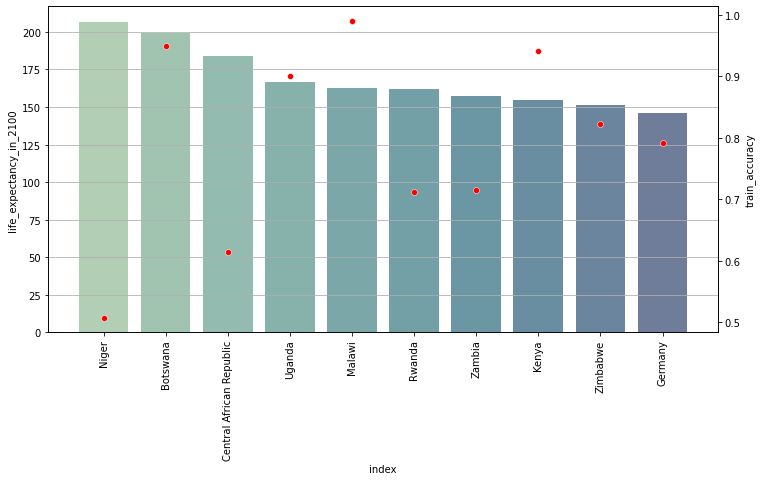

In [6]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
plt.grid(True)
plt.xticks(rotation=90)
sns.barplot(data = dataframe_le_plot, x="index", y='life_expectancy_in_2100', alpha=0.7, palette="crest", ax=ax1)
ax2 = ax1.twinx()
sns.scatterplot(data = dataframe_le_plot['train_accuracy'], marker='o', color='red', ax=ax2)